# ANALISIS DATA SET DIAMONS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


ANALISIS UNIVARIANTE -- analiza una variable al mismo tiempo //
    sns.displot /
    sns.ecdplot /
    sns.counplot /
    sns.kdeplot /
    sns.rugplot



In [3]:
df.sort_values('price', ascending=False, inplace=True)

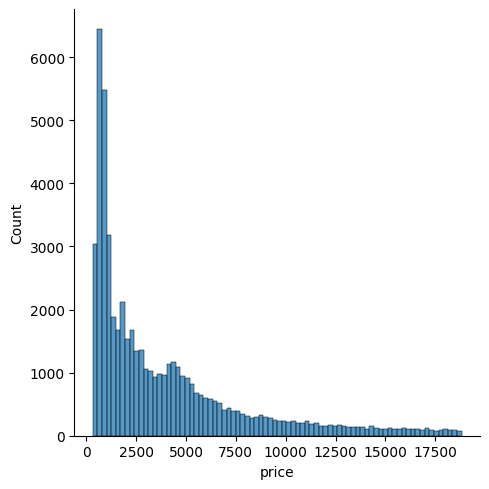

In [4]:
sns.displot(df["price"])

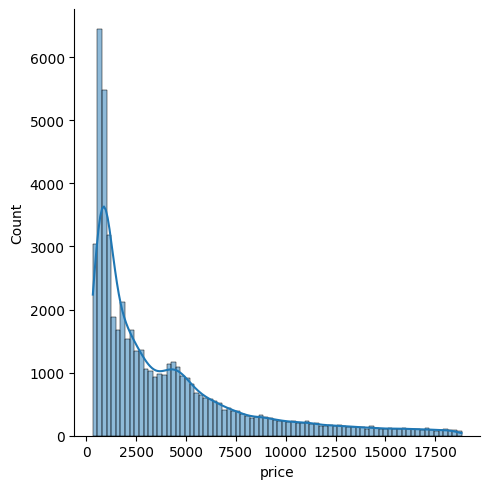

In [5]:
sns.displot(df["price"], kde=True)

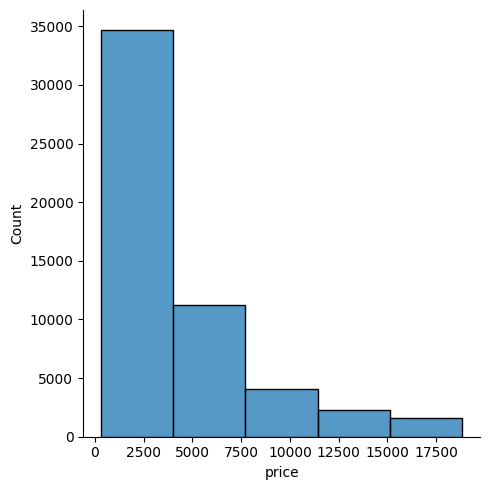

In [6]:
sns.displot(df["price"], bins=5)

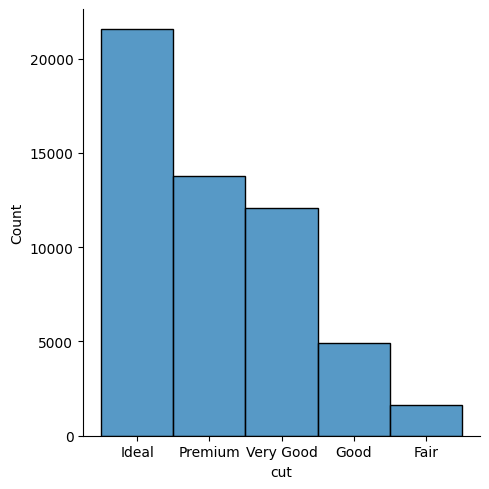

In [7]:

sns.displot(df, x="cut")

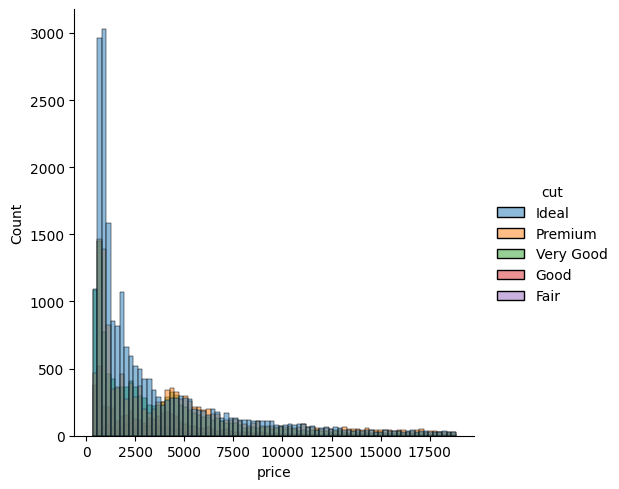

In [8]:
sns.displot(df, x="price", hue="cut")

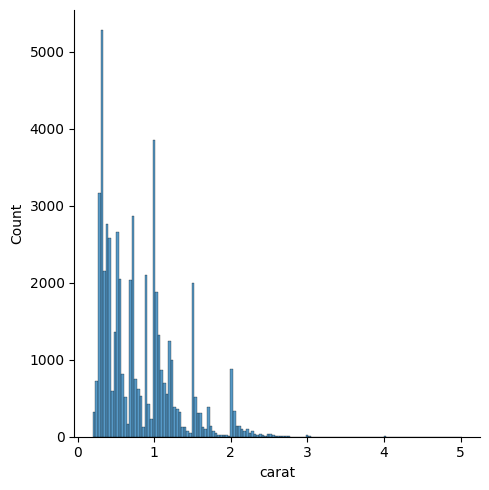

In [9]:
sns.displot(data=df, x="carat")

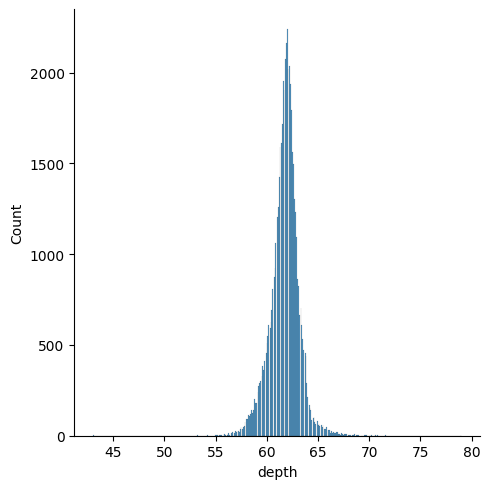

In [10]:
sns.displot(data=df, x="depth")

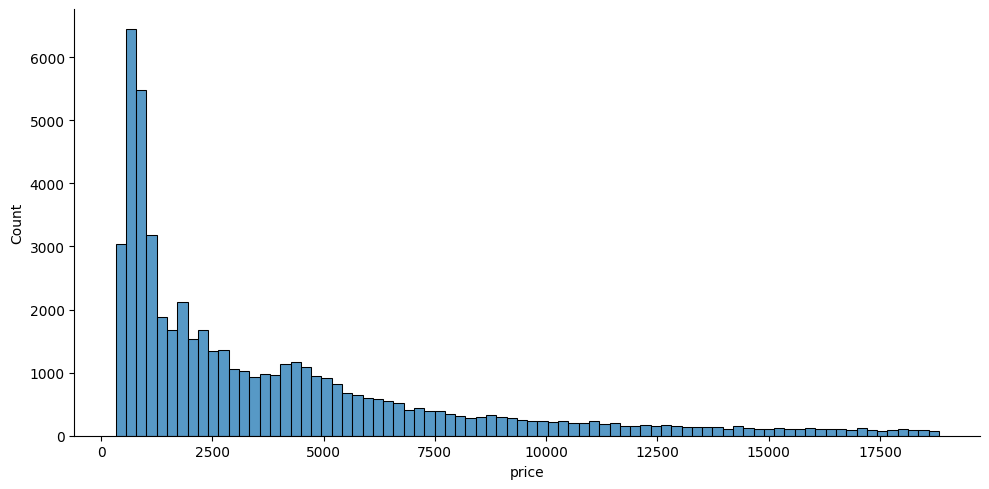

In [11]:
sns.displot(data=df, x="price", height=5, aspect=2)

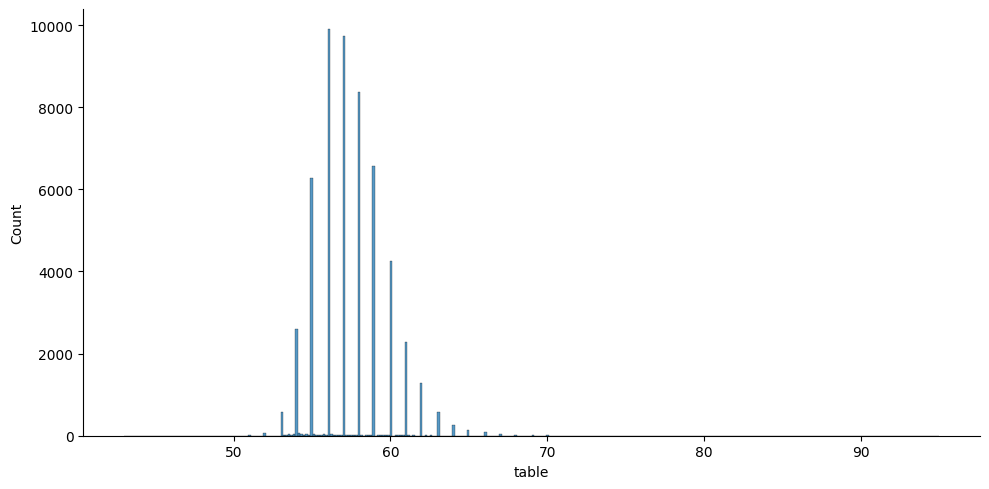

In [12]:
sns.displot(data=df, x="table", height=5, aspect=2)

(0.0, 9.0)

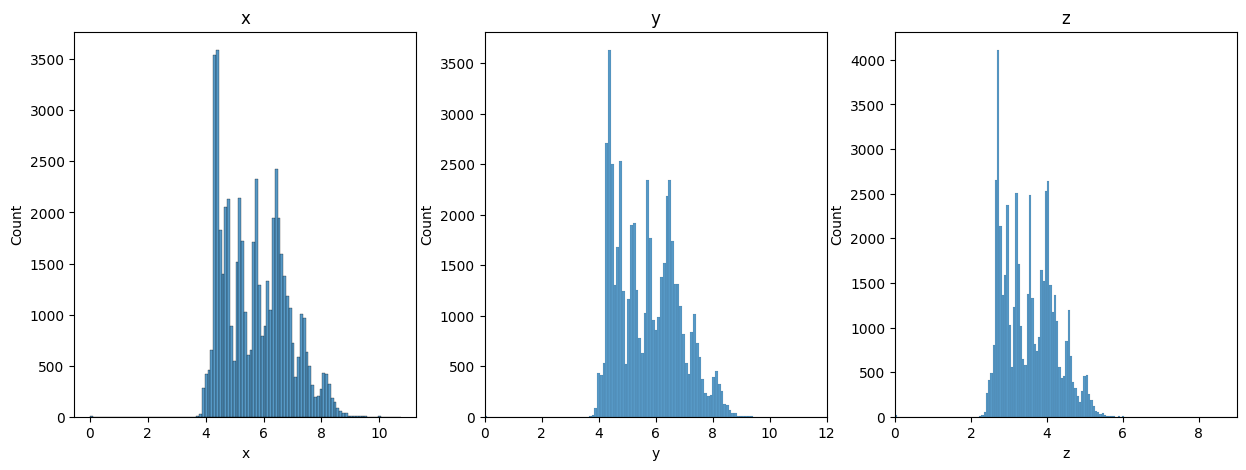

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(data=df, x="x", ax=axes[0])
axes[0].set_title("x")

sns.histplot(data=df, x="y", ax=axes[1])
axes[1].set_title("y")
axes[1].set_xlim([0,12])

sns.histplot(data=df, x="z", ax=axes[2])
axes[2].set_title("z")
axes[2].set_xlim([0,9])


<Axes: xlabel='cut', ylabel='count'>

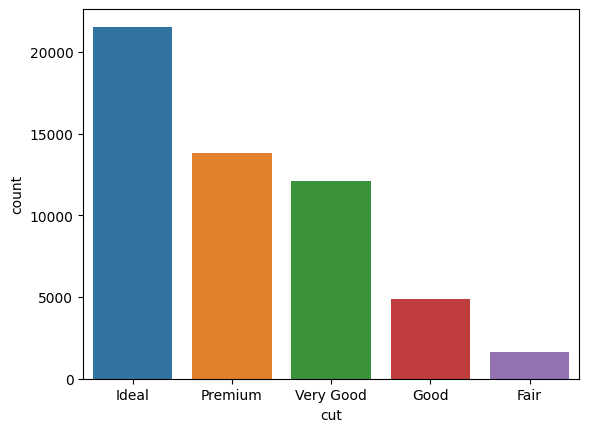

In [14]:
sns.countplot(data=df, x="cut")

In [15]:
print(df['cut'].unique())

['Premium', 'Very Good', 'Ideal', 'Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']


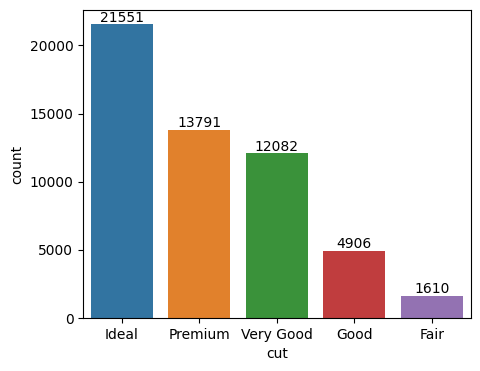

In [16]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='cut')
ax.bar_label(ax.containers[0]);

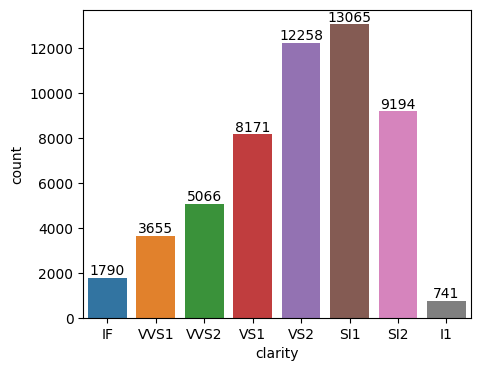

In [17]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='clarity')
ax.bar_label(ax.containers[0]);

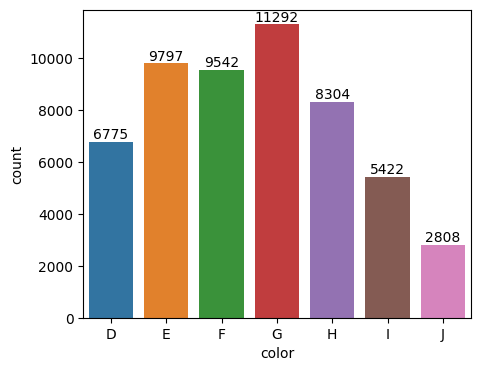

In [18]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='color')
ax.bar_label(ax.containers[0]);

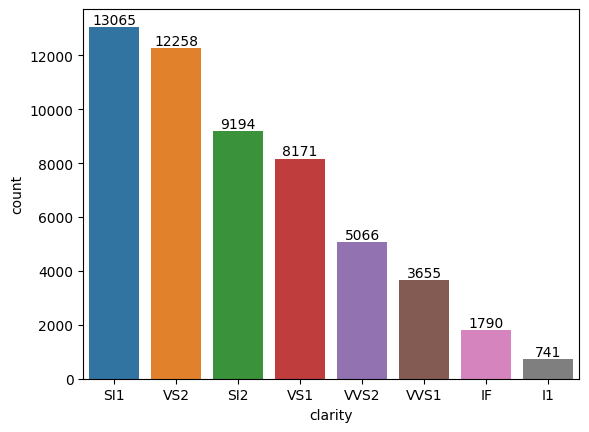

In [19]:
order = df['clarity'].value_counts().index
ax = sns.countplot(data = df, x='clarity', order=order)
ax.bar_label(ax.containers[0]);

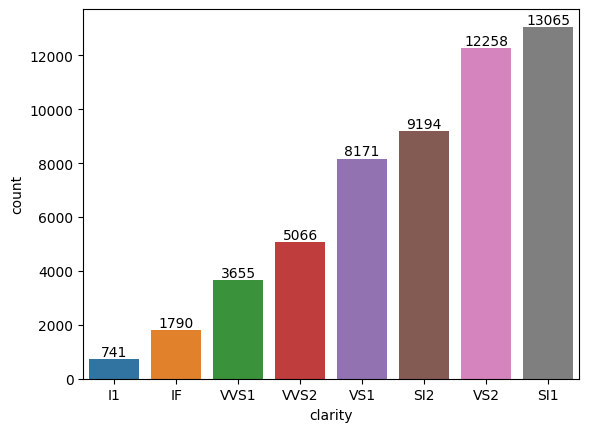

In [20]:
order = df['clarity'].value_counts(ascending=True).index
ax = sns.countplot(data = df, x='clarity', order=order)
ax.bar_label(ax.containers[0]);

<Axes: xlabel='price', ylabel='Density'>

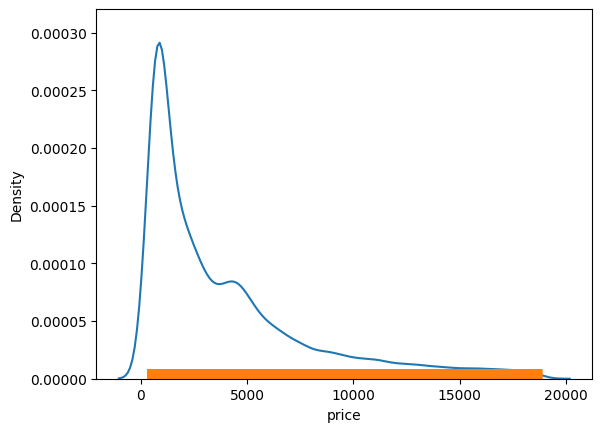

In [21]:
sns.kdeplot(data=df, x='price')
sns.rugplot(data=df, x='price')

<Axes: xlabel='table', ylabel='Density'>

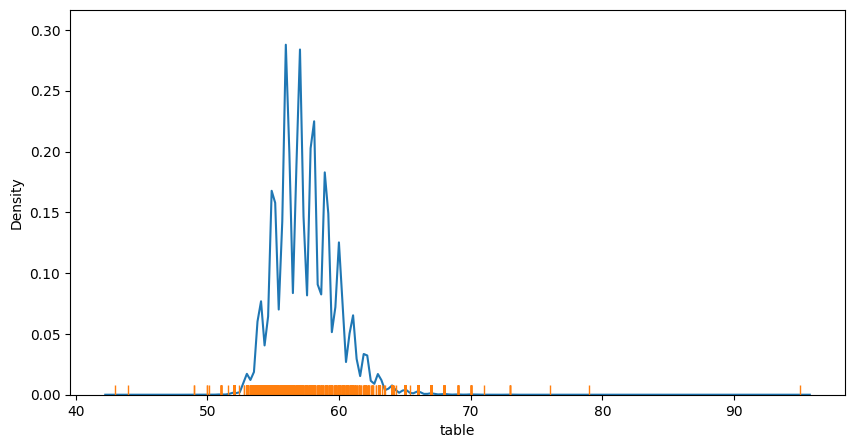

In [22]:
plt.figure(figsize=(10,5), dpi=100)
sns.kdeplot(data=df, x='table')
sns.rugplot(data=df, x='table')

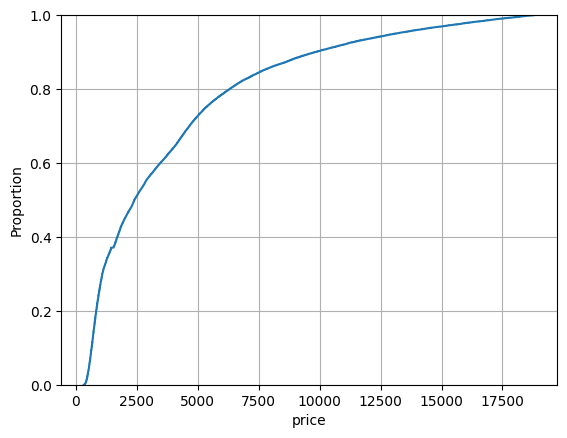

In [23]:
sns.ecdfplot(data=df, x='price');
plt.grid()

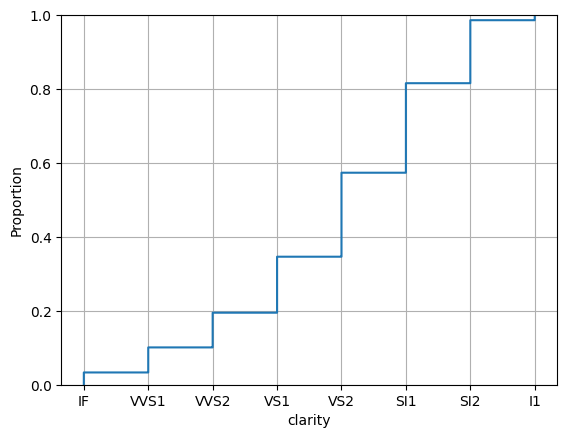

In [24]:
sns.ecdfplot(data=df, x='clarity');
plt.grid()

<Axes: xlabel='price'>

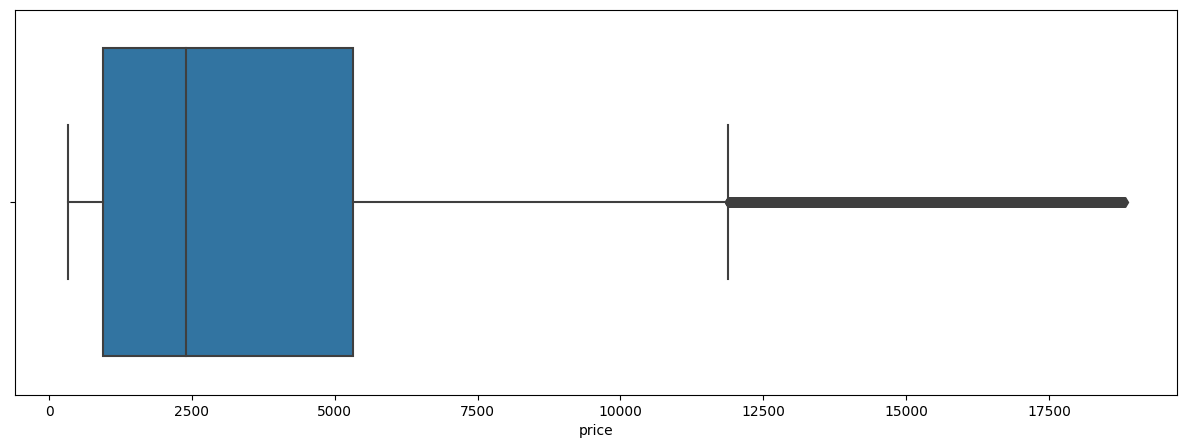

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='price')

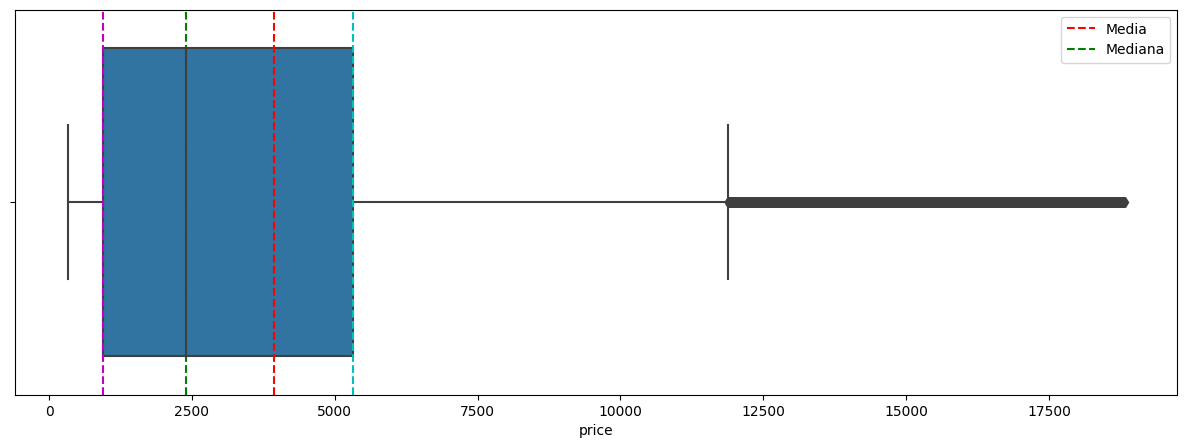

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='price')
mean_line = plt.axvline(df['price'].mean(), color='r', linestyle='--')
median_line = plt.axvline(df['price'].median(), color='g', linestyle='--')
p25_line = plt.axvline(df['price'].quantile(0.25), color='m', linestyle='--')
p25_line = plt.axvline(df['price'].quantile(0.75), color='c', linestyle='--')
plt.legend([mean_line, median_line], ['Media', 'Mediana'])


ANALISIS BIVARIANTE -- analisa dos variables al mismo tiempo // sns.relplot / sns.joinplot / sns.lineplot

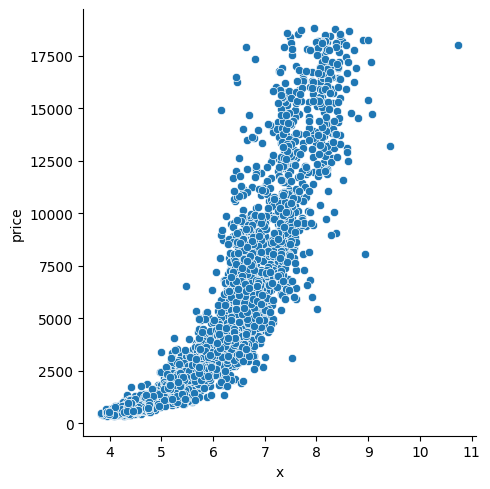

In [27]:
df_sample = df.sample(5000)
sns.relplot(data= df_sample, x='x', y='price')


Text(0.5, 1.0, 'Relacion Precio Vs Kilates')

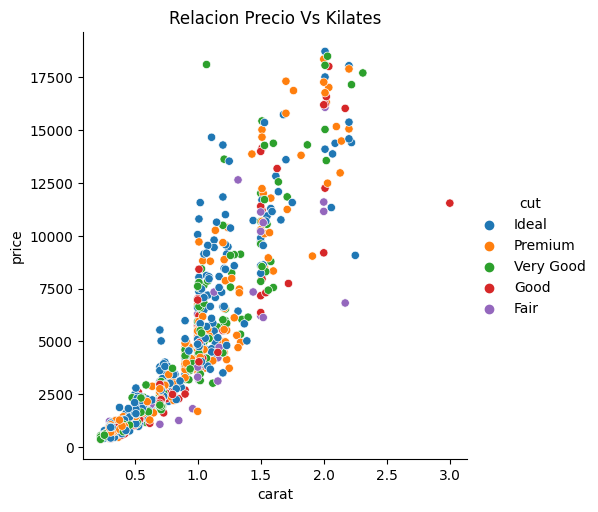

In [28]:
df_sample = df.sample(1000)
sns.relplot(data= df_sample, x='carat', y='price', hue='cut')
plt.title('Relacion Precio Vs Kilates')

Text(0.5, 1.0, 'Distribucion de precio por corte de diamante')

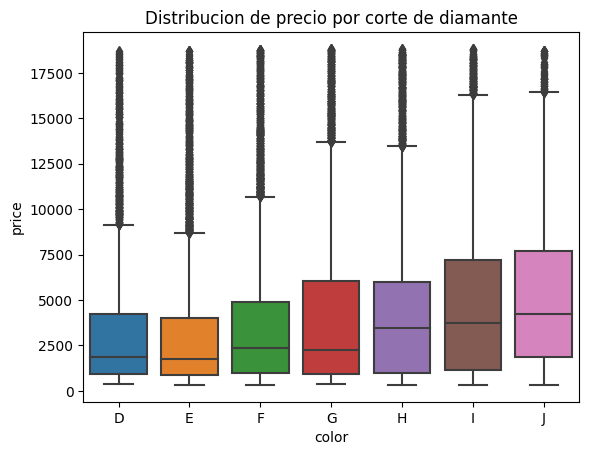

In [29]:
sns.boxplot(data=df, x='color', y='price')
plt.title('Distribucion de precio por corte de diamante')

Text(0.5, 1.0, 'Distribucion de precio por corte de diamante')

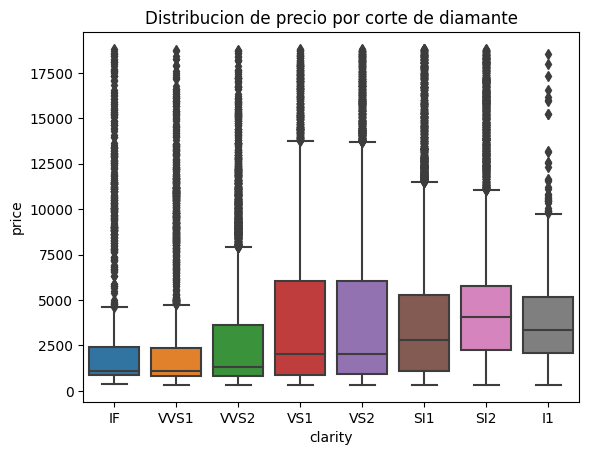

In [30]:
sns.boxplot(data=df, x='clarity', y='price')
plt.title('Distribucion de precio por corte de diamante')

<Axes: xlabel='clarity', ylabel='price'>

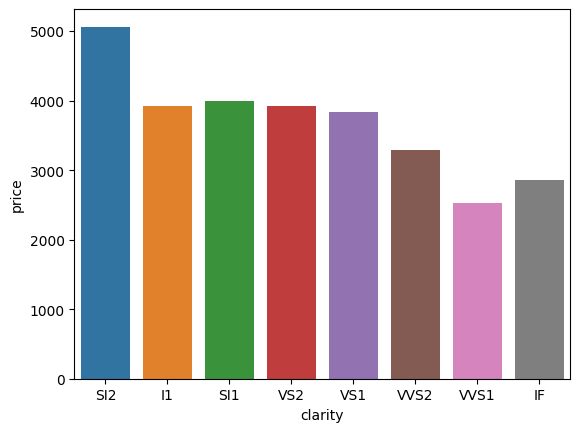

In [31]:
df_price_by_clarity = df.groupby('clarity')['price'].median().reset_index().sort_values('price', ascending=False)
sns.barplot(data=df, x='clarity', y='price', errorbar=None, order=df_price_by_clarity['clarity'])


<Axes: xlabel='cut', ylabel='price'>

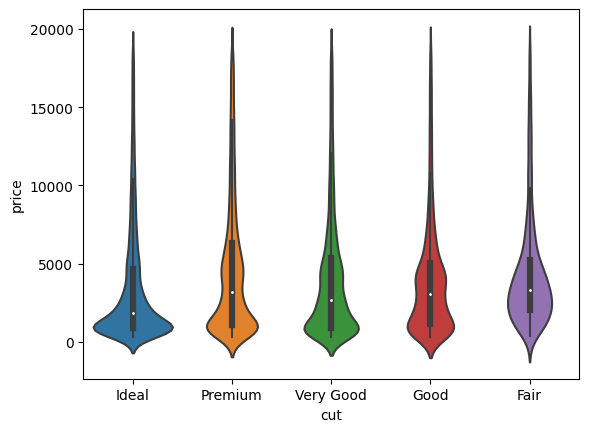

In [32]:
# sns.violinplot: price en base cut, clarity, color
sns.violinplot(data=df, x='cut', y='price')

<Axes: xlabel='cut', ylabel='carat'>

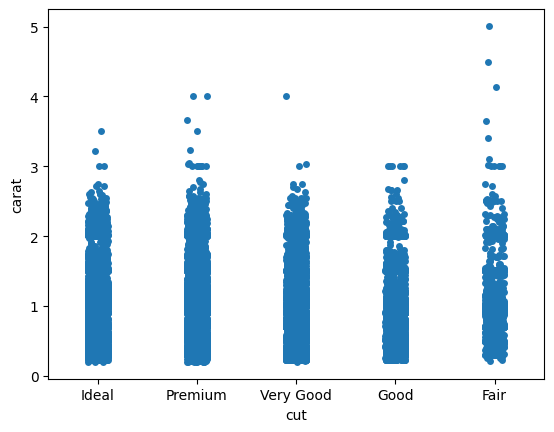

In [33]:
# sns.stripplot
sns.stripplot(data=df, x='cut', y='carat')

<Axes: xlabel='cut', ylabel='price'>

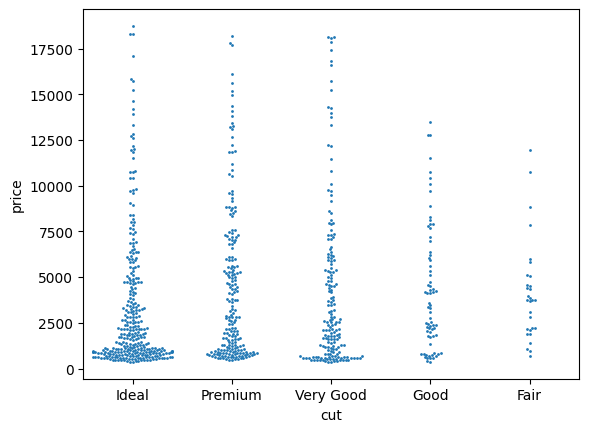

In [34]:
# sns.swarmplot: CUIDADO consume recursos dado que no superpone los puntos
sns.swarmplot(data=df.sample(800), x='cut', y='price', size=2)

<Axes: xlabel='cut', ylabel='price'>

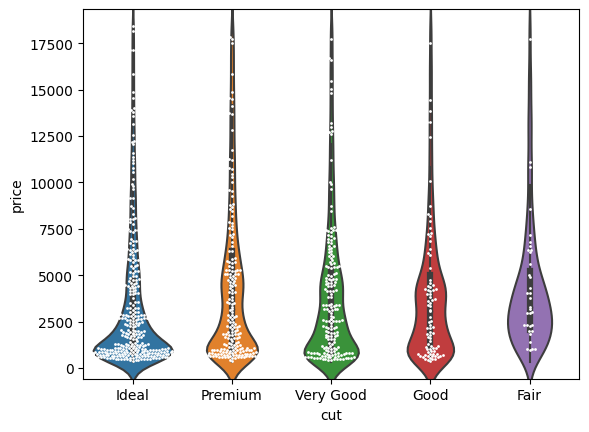

In [35]:
sns.violinplot(data=df, x='cut', y='price')
sns.swarmplot(data=df.sample(800), x='cut', y='price', size=2, color='white')

ANALISIS MULTIVARIANTE -- analisa varias variables al mism tiempo // sns.pairplot / sns.replot ()con hue, col, row, size / sns.heatmap / sns.clustermap

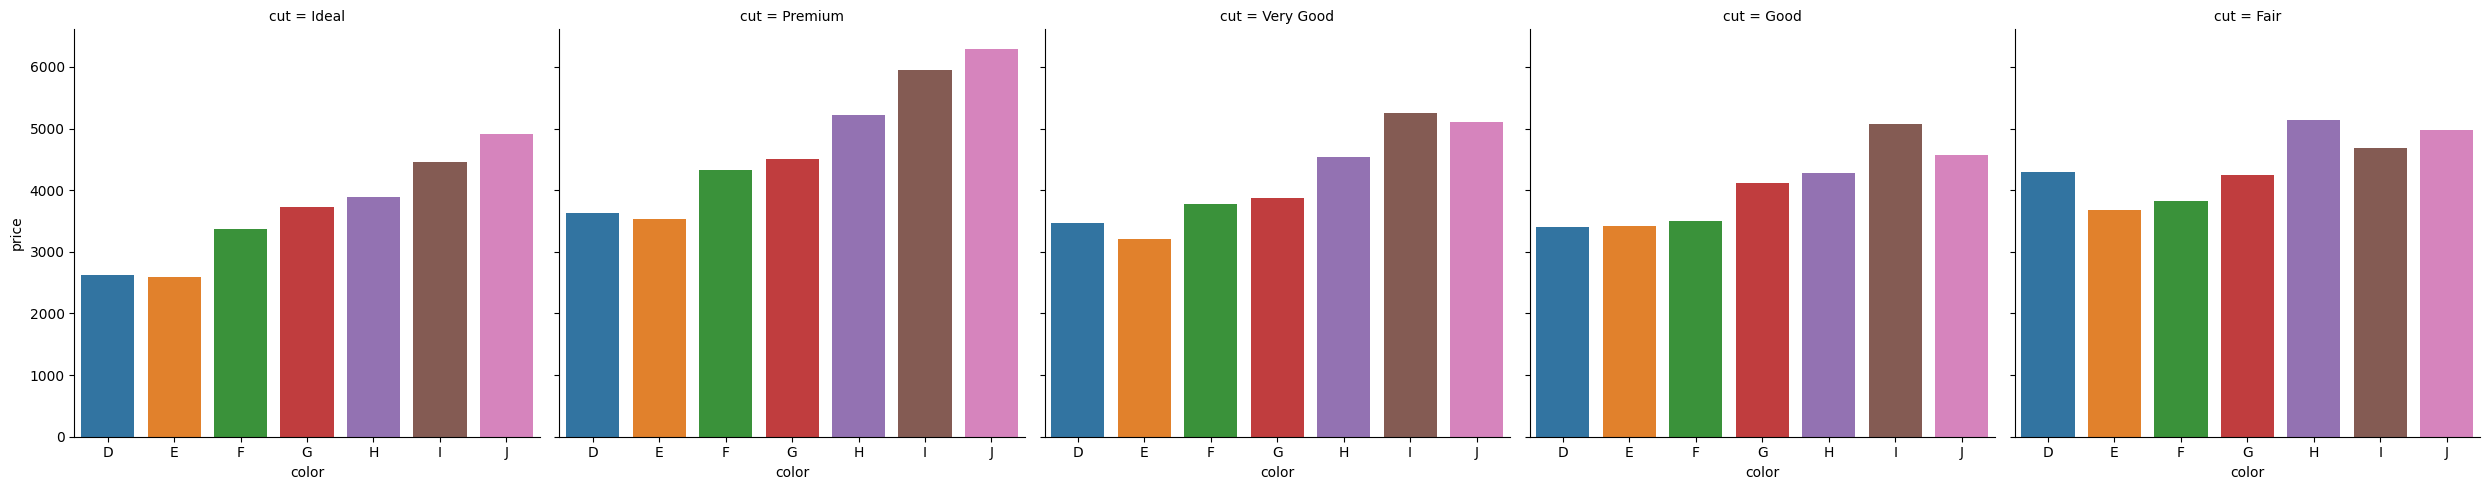

In [45]:
sns.catplot(data=df, x='color', y='price', col='cut', kind='bar', errorbar=None)

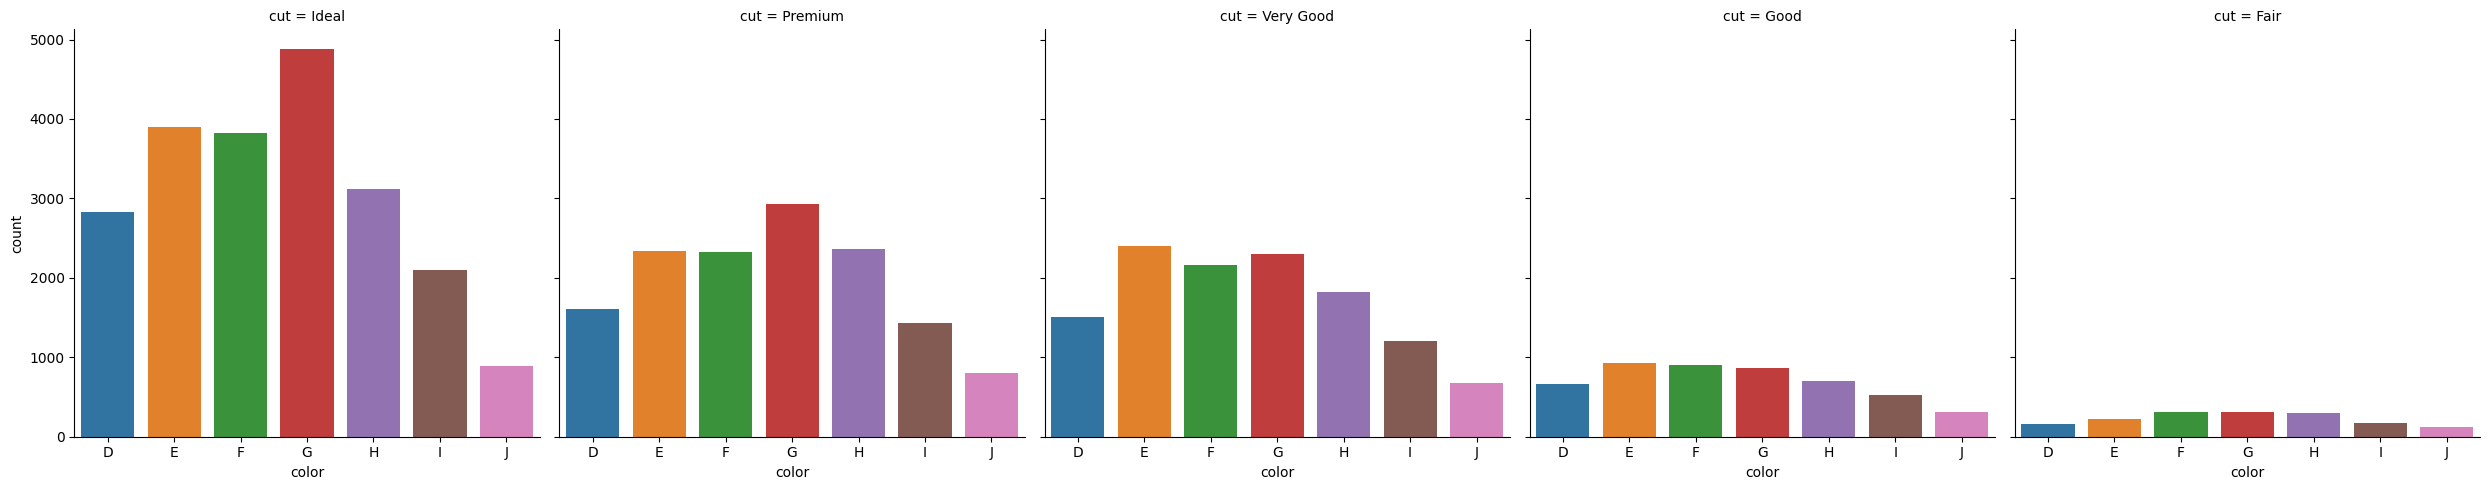

In [36]:
sns.catplot(data=df, x='color', col='cut', kind='count')

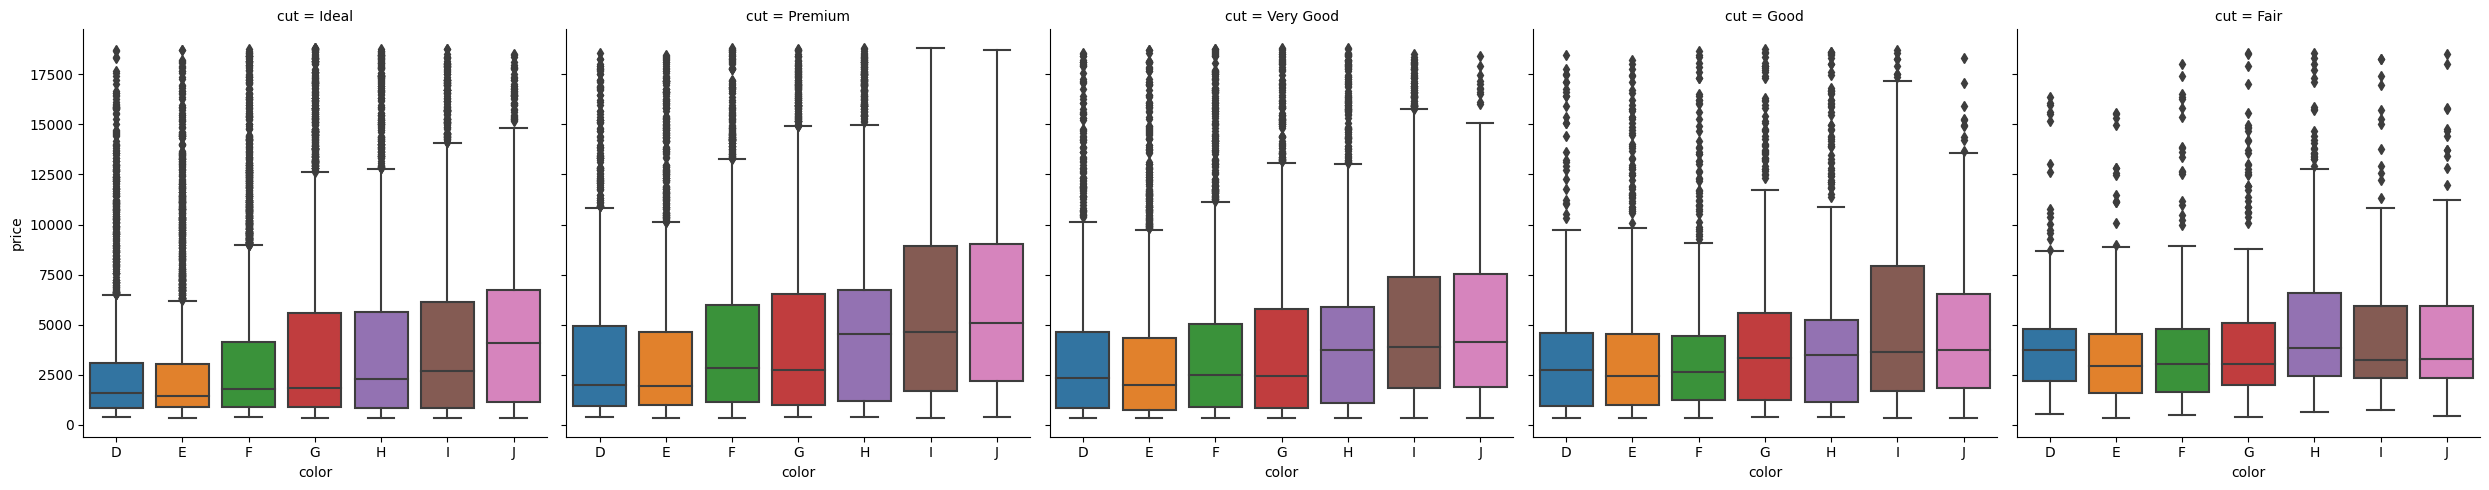

In [38]:
sns.catplot(data=df, x='color', y='price', col='cut', kind='box')

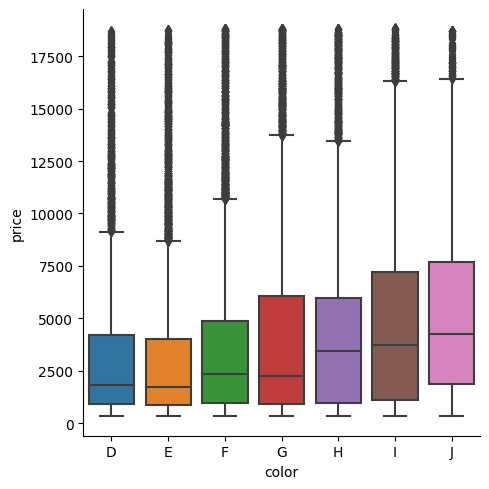

In [42]:
sns.catplot(data=df, x='color', y='price', kind='box')

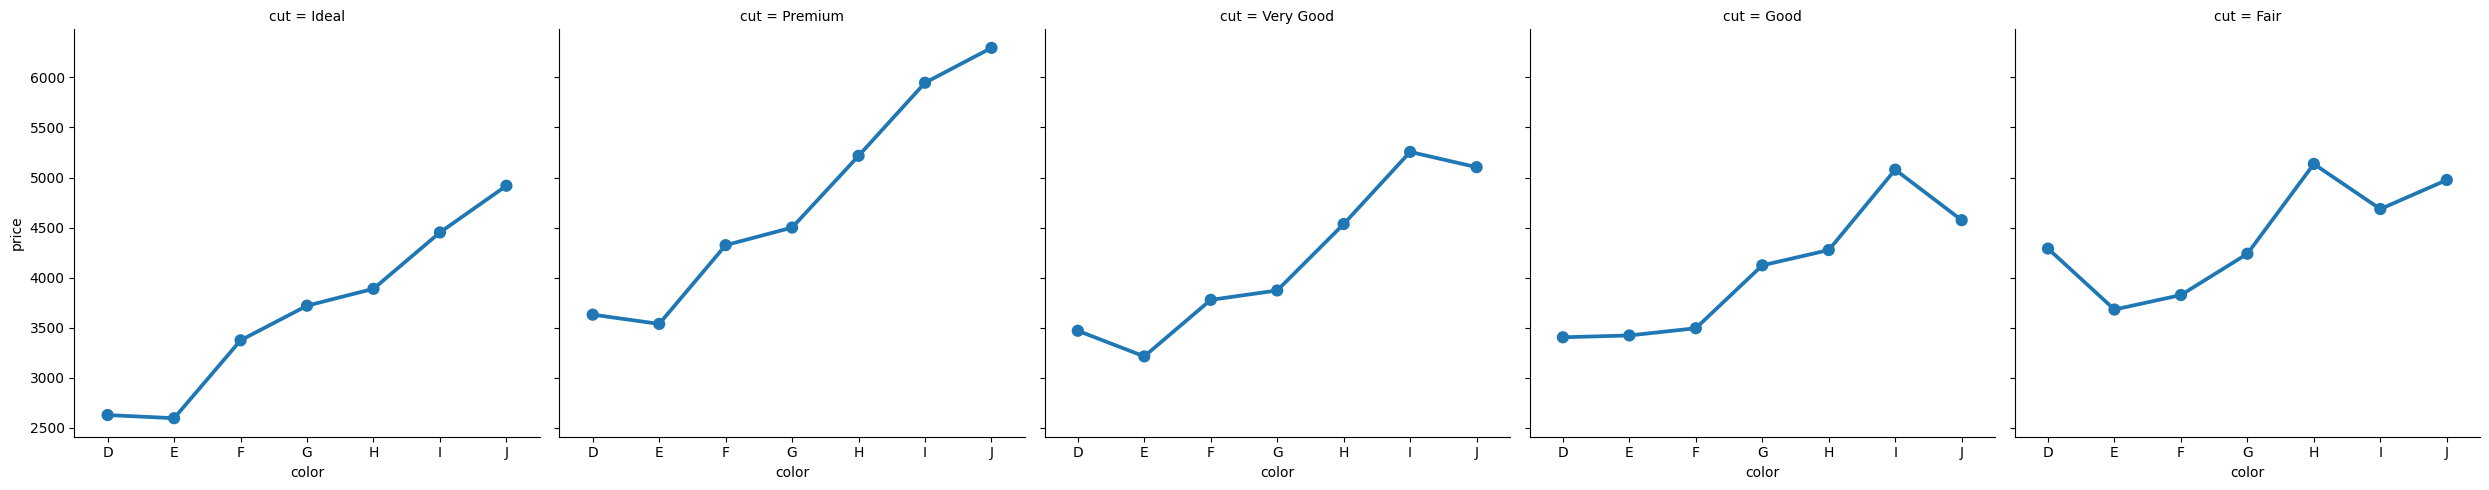

In [47]:
sns.catplot(data=df, x='color', y='price', col='cut', kind='point', errorbar=None)

HEATMAP


<Axes: >

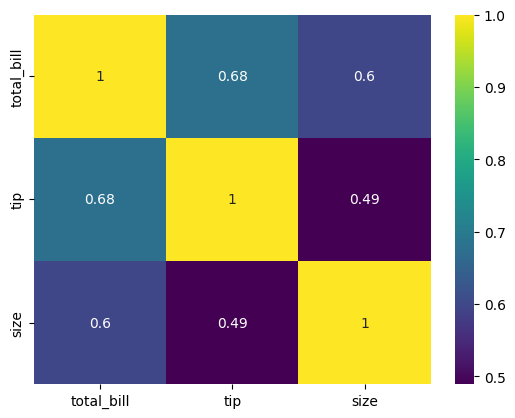

In [48]:
df= sns.load_dataset('tips')
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='viridis')


In [49]:
df_corr = df_corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='viridis')

TypeError: 'DataFrame' object is not callable